# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


     |████████████████████████████████| 993kB 4.7MB/s 


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

Output hidden; open in https://colab.research.google.com to view.

## 1.1 Reading Data

In [0]:
# Download a file based on its file ID.
#https://drive.google.com/file/d/1T48h84GLW3dpy9F6ble5nF_1gQxBO8rx/view?usp=sharing
file_id = '1T48h84GLW3dpy9F6ble5nF_1gQxBO8rx'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('train_data.csv')

In [0]:
project_data = pd.read_csv('train_data.csv')


In [0]:
project_data.shape
project_data = project_data.sample(frac = 0.47)

In [7]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (51347, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
# Download a file based on its file ID.
#https://drive.google.com/file/d/14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe/view?usp=sharing
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#https://drive.google.com/file/d/14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe/view?usp=sharing
file_id = '14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('resources.csv')

In [0]:
resource_data = pd.read_csv('resources.csv')
resource_data = resource_data.sample(frac = 0.47)


In [11]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (724398, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
835341,p073641,Igneous Rocks Collection,1,23.17
567533,p095355,"Captain Underpants and the Big, Bad Battle of ...",1,3.89


## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [15]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
66168,173817,p243561,01229d7ac4bc3c1f890028246032c792,Ms.,NY,2017-02-06 09:27:38,Grades 6-8,Science Supplies for Laboratory Learning,"In a room surrounded by animals and plants, my...",My students are always so eager to make scienc...,NaN,NaN,My students need schools supplies such as pens...,44,1,Math_Science,AppliedSciences EnvironmentalScience,"In a room surrounded by animals and plants, my..."
94206,154881,p044676,5bd5acd4b20f79b2153d46c83a2c2e28,Mrs.,TX,2017-01-05 12:09:09,Grades 6-8,Headphones for Flipped Classroom Model,"As a former graduate from Everman ISD, I could...","My students get to learn at their own pace, as...",NaN,NaN,My students need headphones in order to comple...,0,1,Math_Science,AppliedSciences,"As a former graduate from Everman ISD, I could..."


In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [17]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[2000])
print("="*50)


In a room surrounded by animals and plants, my students enter our jungle of a classroom engulfed by science. The classroom is designed for exploration through research and learning, via hands-on activities. By the end of the year, I want my students to be at the forefront of a STEM education. \r\n\r\nEach student is unique in his/her own way, which makes learning that much more special.\r\n\r\nMy students love learning about the ever-changing world of science, and are captured by the fact that every day brings new discoveries in science. The school is a welcoming environment, that encourages higher-level learning, while supporting the students at every step. The school houses over 1400 middle school students, who come from different ethnic backgrounds. In order to strengthen their learning experience, I want my students to utilize all the possible resources I can provide for them.\r\nMy students are always so eager to make science learning more fun by creating hands-on colorful activit

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
sent = decontracted(project_data['essay'].values[2000])
print(sent)
print("="*50)

My 4th grade students attend a Title 1 campus with a high number of economically disadvantaged children.  Many students face factors outside of the school environment that sometimes make it difficult to keep their focus on learning, while at school.  Although some face such adversity, they come to school as an escape.\r\n\r\nMy students take pride in their school and in their classroom, and are eager to learn new things!  They are excited about learning and desire, engaging meaningful lessons in which they can make connections and think outside of the box.My students learn best when they are engaged and are having fun.  These interactive Reading skills games will help them do just that.  Many students struggle with Reading, Reading comprehension and fluency, therefore leading to struggles with 4th grade Writing skills.  These interactive Reading board games will not only allow for targeted intervention, it will also help them build confidence in themselves and take pride in their learn

In [20]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My 4th grade students attend a Title 1 campus with a high number of economically disadvantaged children.  Many students face factors outside of the school environment that sometimes make it difficult to keep their focus on learning, while at school.  Although some face such adversity, they come to school as an escape.    My students take pride in their school and in their classroom, and are eager to learn new things!  They are excited about learning and desire, engaging meaningful lessons in which they can make connections and think outside of the box.My students learn best when they are engaged and are having fun.  These interactive Reading skills games will help them do just that.  Many students struggle with Reading, Reading comprehension and fluency, therefore leading to struggles with 4th grade Writing skills.  These interactive Reading board games will not only allow for targeted intervention, it will also help them build confidence in themselves and take pride in their learning.

In [21]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My 4th grade students attend a Title 1 campus with a high number of economically disadvantaged children Many students face factors outside of the school environment that sometimes make it difficult to keep their focus on learning while at school Although some face such adversity they come to school as an escape My students take pride in their school and in their classroom and are eager to learn new things They are excited about learning and desire engaging meaningful lessons in which they can make connections and think outside of the box My students learn best when they are engaged and are having fun These interactive Reading skills games will help them do just that Many students struggle with Reading Reading comprehension and fluency therefore leading to struggles with 4th grade Writing skills These interactive Reading board games will not only allow for targeted intervention it will also help them build confidence in themselves and take pride in their learning I want my students to g

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","."]

In [23]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 51347/51347 [00:31<00:00, 1624.27it/s]


In [24]:
# after preprocesing
preprocessed_essays[2000]

'my 4th grade students attend title 1 campus high number economically disadvantaged children many students face factors outside school environment sometimes make difficult keep focus learning school although face adversity come school escape my students take pride school classroom eager learn new things they excited learning desire engaging meaningful lessons make connections think outside box my students learn best engaged fun these interactive reading skills games help many students struggle reading reading comprehension fluency therefore leading struggles 4th grade writing skills these interactive reading board games not allow targeted intervention also help build confidence take pride learning i want students get excited reading writing sometimes students create idea heads reading hard these kiddos want give even try i want help build self worth find confidence need successful 4th grade readers writers all materials requested directly impact student reading writing skills these gam

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [25]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 51347/51347 [00:01<00:00, 33918.03it/s]


## 1.5 Preparing data for models

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [0]:
project_data.drop(['essay'], axis=1, inplace=True)
project_data.drop(['project_title'], axis=1, inplace=True)

project_data['essay'] = preprocessed_essays
project_data['project_title'] = preprocessed_titles

In [28]:
Y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,project_title
66168,173817,p243561,01229d7ac4bc3c1f890028246032c792,Ms.,NY,2017-02-06 09:27:38,Grades 6-8,"In a room surrounded by animals and plants, my...",My students are always so eager to make scienc...,NaN,NaN,My students need schools supplies such as pens...,44,Math_Science,AppliedSciences EnvironmentalScience,in room surrounded animals plants students ent...,science supplies laboratory learning


#2.Decision Trees

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label


In [0]:
from sklearn.model_selection import train_test_split
#splitting categorical data
# clean_categories
X = project_data

X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.33,random_state = 0 ,stratify = Y)
X_train_cv, X_test_cv,Y_train_cv, Y_test_cv  = train_test_split(X_train,Y_train,test_size = 0.25,random_state = 0)



<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [31]:
#categories
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict), lowercase=False, binary=True)
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(X_train['clean_categories'])
ft_cc = vectorizer.get_feature_names()
print(ft_cc)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

categories_one_hot_te = vectorizer.transform(X_test['clean_categories'])
print("Shape of matrix after one hot encodig ",categories_one_hot_te.shape)


categories_one_hot_tecv = vectorizer.transform(X_test_cv['clean_categories'])
print("Shape of matrix after one hot encodig ",categories_one_hot_tecv.shape)


['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (34402, 9)
Shape of matrix after one hot encodig  (16945, 9)
Shape of matrix after one hot encodig  (8601, 9)


In [32]:
#subcategories
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(X_train['clean_subcategories'])
ft_csc = vectorizer.get_feature_names()
print(ft_csc)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

sub_categories_one_hot_te = vectorizer.transform(X_test['clean_subcategories'])
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_te.shape)

sub_categories_one_hot_tecv = vectorizer.transform(X_test_cv['clean_subcategories'])
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_tecv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'Warmth', 'Care_Hunger', 'NutritionEducation', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'ESL', 'EarlyDevelopment', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (34402, 30)
Shape of matrix after one hot encodig  (16945, 30)
Shape of matrix after one hot encodig  (8601, 30)


In [0]:
from collections import Counter
my_counter = Counter()
for word in X_train['school_state'].values:
    if not isinstance(word, float):
      word = word.replace('.',' ')
      my_counter.update(word.split())
       
sorted_school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(sorted_school_state_dict.items(), key=lambda kv: kv[1]))

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
ft_ss = vectorizer.get_feature_names()
print(ft_ss)


school_state_one_hot = vectorizer.transform(X_train['school_state'])
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)


school_state_one_hot_te = vectorizer.transform(X_test['school_state'])
print("Shape of matrix after one hot encodig ",school_state_one_hot_te.shape)

school_state_one_hot_tecv = vectorizer.transform(X_test_cv['school_state'])
print("Shape of matrix after one hot encodig ",school_state_one_hot_tecv.shape)

['VT', 'ND', 'WY', 'MT', 'RI', 'NE', 'SD', 'DE', 'AK', 'NH', 'WV', 'NM', 'DC', 'ME', 'HI', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'KY', 'OR', 'MS', 'NV', 'MD', 'TN', 'CT', 'UT', 'WI', 'AL', 'VA', 'AZ', 'NJ', 'WA', 'LA', 'OK', 'MA', 'OH', 'IN', 'MO', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of matrix after one hot encodig  (34402, 51)
Shape of matrix after one hot encodig  (16945, 51)
Shape of matrix after one hot encodig  (8601, 51)


In [0]:
from collections import Counter
my_counter = Counter()
for word in X_train['teacher_prefix'].values:
    if not isinstance(word, float):
      word = word.replace('.',' ')
      my_counter.update(word.split())
       
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

In [36]:
##Vectorizing teacher_prefix
# we use count vectorizer to convert the values into one hot encoded features
#https://blog.csdn.net/ningzhimeng/article/details/80953916
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].astype('U'))
ft_tp = vectorizer.get_feature_names()
print(ft_tp)

teacher_prefix_one_hot = vectorizer.transform(X_train['teacher_prefix'].astype("U"))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

teacher_prefix_one_hot_te = vectorizer.transform(X_test['teacher_prefix'].astype("U"))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_te.shape)

teacher_prefix_one_hot_tecv = vectorizer.transform(X_test_cv['teacher_prefix'].astype("U"))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_tecv.shape)




['Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']
Shape of matrix after one hot encodig  (34402, 5)
Shape of matrix after one hot encodig  (16945, 5)
Shape of matrix after one hot encodig  (8601, 5)


In [0]:
from collections import Counter
my_counter = Counter()
for word in X_train['project_grade_category'].values:
   if not isinstance(word, float):
    word = word.replace('Grades',' ')
    my_counter.update(word.split())
project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))


In [38]:
##Vectorizing project_grade_category
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
ft_pgc = vectorizer.get_feature_names()
print(ft_pgc)


project_grade_category_one_hot = vectorizer.transform(X_train['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot.shape)

project_grade_category_one_hot_te = vectorizer.transform(X_test['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_te.shape)

project_grade_category_one_hot_tecv = vectorizer.transform(X_test_cv['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_tecv.shape)


['9-12', '6-8', '3-5', 'PreK-2']
Shape of matrix after one hot encodig  (34402, 4)
Shape of matrix after one hot encodig  (16945, 4)
Shape of matrix after one hot encodig  (8601, 4)


### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:

X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [0]:

#splitting numerical features
X_train_p, X_test_p = train_test_split(project_data['price'].values,test_size = 0.33,shuffle = False , random_state = 0)
X_train_pcv, X_test_pcv = train_test_split(X_train_p,test_size = 0.25,shuffle = False , random_state = 0)

In [42]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)
#normalized_X = preprocessing.normalize(X)
X_train_p[np.isnan(X_train_p)] = np.median(X_train_p[~np.isnan(X_train_p)])
Normalizer().fit(X_train_p.reshape(-1,1))
price_normalized = Normalizer().transform(X_train_p.reshape(-1,1))

X_test_pcv[np.isnan(X_test_pcv)] = np.median(X_test_pcv[~np.isnan(X_test_pcv)])
price_normalized_tecv= Normalizer().transform(X_test_pcv.reshape(-1,1))

X_test_p[np.isnan(X_test_p)] = np.median(X_test_p[~np.isnan(X_test_p)])
price_normalized_te= Normalizer().transform(X_test_p.reshape(-1,1))

print(price_normalized.shape)

print(price_normalized_tecv.shape)
print(price_normalized_te.shape)





(34402, 1)
(8601, 1)
(16945, 1)


In [43]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
normalizerT = Normalizer()

normalizerT.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

train_tnpp = normalizerT.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
test_cv_tnpp = normalizerT.transform(X_test_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
test_tnpp = normalizerT.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


print(train_tnpp.shape)
print(test_cv_tnpp.shape)
print(test_tnpp.shape)


(34402, 1)
(8601, 1)
(16945, 1)


In [44]:
X_train.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,project_title,price,quantity
0,52575,p208619,da91d09fa8042a4b70b0defa9e34dccb,Ms.,LA,2016-09-17 12:45:21,Grades PreK-2,My 22 wonderful babies come from all around Ne...,"Each day, my scholars push themselves to grow ...",NaN,NaN,"My students need activities for reading, writi...",0,Literacy_Language Math_Science,Literature_Writing Mathematics,my 22 wonderful babies come around new orleans...,reading writing math centers oh my,468.68,10.0
1,87550,p200635,eba5196cbda3603587306aedd2cd4d4f,Ms.,CA,2016-11-18 17:58:03,Grades 3-5,My students are special because they fight thr...,These materials will make a difference in my s...,NaN,NaN,My students need books that are high interest ...,1,Literacy_Language,Literacy,my students special fight hardships continue p...,keep calm love reading,40.74,6.0


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

##Bag of words

### Bag of words

In [46]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_b = CountVectorizer(ngram_range=(2,2),min_df = 10,max_features = 10000)
text_bow = vectorizer_b.fit(X_train['essay'])
text_bow = vectorizer_b.transform(X_train['essay'])
print("Shape of matrix after one hot encodig ",text_bow.shape)

text_bow_te = vectorizer_b.transform(X_test['essay'])
print("Shape of matrix after one hot encodig ",text_bow_te.shape)

text_bow_tecv = vectorizer_b.transform(X_test_cv['essay'])
print("Shape of matrix after one hot encodig ",text_bow_tecv.shape)

ft_bow_e = vectorizer_b.get_feature_names()
print(ft_bow_e)

Shape of matrix after one hot encodig  (34402, 10000)
Shape of matrix after one hot encodig  (16945, 10000)
Shape of matrix after one hot encodig  (8601, 10000)
['000 students', '10 students', '10 year', '10 years', '100 free', '100 percent', '100 students', '1000 students', '10th grade', '12 students', '12 years', '12th grade', '15 minutes', '15 students', '150 students', '18 students', '1st 2nd', '1st grade', '1st graders', '20 minutes', '20 students', '20 years', '200 students', '2016 2017', '2017 school', '21 students', '21st century', '22 students', '23 students', '24 students', '25 students', '26 students', '27 students', '28 students', '2nd 3rd', '2nd grade', '2nd graders', '30 minutes', '30 students', '300 students', '32 students', '35 students', '3d printer', '3d printing', '3rd 4th', '3rd 5th', '3rd grade', '3rd graders', '40 students', '400 students', '45 minutes', '4th 5th', '4th grade', '4th graders', '50 students', '500 students', '5th 6th', '5th grade', '5th graders', '6

In [0]:
#bow of Project_titles

In [48]:
vectorizer_t = CountVectorizer(min_df=10,ngram_range=(2,2), max_features=10000)
titles_bow = vectorizer_t.fit_transform(X_train['project_title'])
print("Shape of matrix after one hot encodig ",titles_bow.shape)

titles_bow_te = vectorizer_t.transform(X_test['project_title'])
print("Shape of matrix after one hot encodig ",titles_bow_te.shape)

titles_bow_tecv = vectorizer_t.transform(X_test_cv['project_title'])
print("Shape of matrix after one hot encodig ",titles_bow_tecv.shape)

ft_bow_pt = vectorizer_t.get_feature_names()
print(ft_bow_pt)


Shape of matrix after one hot encodig  (34402, 1110)
Shape of matrix after one hot encodig  (16945, 1110)
Shape of matrix after one hot encodig  (8601, 1110)
['1st grade', '1st graders', '2016 2017', '21st century', '2nd grade', '2nd graders', '3d printer', '3d printing', '3rd grade', '3rd graders', '4th grade', '4th graders', '5th grade', '5th graders', '6th grade', '8th grade', 'about it', 'about our', 'about reading', 'about that', 'academic success', 'active bodies', 'active kids', 'active learners', 'active learning', 'active minds', 'active play', 'active seating', 'active students', 'after flood', 'after school', 'all aboard', 'all about', 'all around', 'all day', 'all hands', 'all learners', 'all students', 'alternative seating', 'an apple', 'an ipad', 'and learn', 'apple day', 'are not', 'are on', 'are ready', 'are you', 'around us', 'around world', 'art class', 'art room', 'art science', 'art supplies', 'art technology', 'at our', 'at time', 'atpe member', 'autism classroom',

### combining data


In [49]:
%time
from scipy.sparse import hstack
#with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train= hstack(( categories_one_hot,sub_categories_one_hot,teacher_prefix_one_hot,school_state_one_hot,train_tnpp,project_grade_category_one_hot,text_bow,titles_bow,price_normalized)).tocsr()
#x_train = x_train.toarray()
#x_train[np.isnan(x_train)] = np.median(x_train[~np.isnan(x_train)])
x_train.shape

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


(34402, 11211)

In [50]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test= hstack((categories_one_hot_te, sub_categories_one_hot_te,teacher_prefix_one_hot_te,test_tnpp,school_state_one_hot_te,project_grade_category_one_hot_te,text_bow_te,titles_bow_te,price_normalized_te)).tocsr()
#x_test = x_test.toarray()
#x_test[np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])
x_test.shape

(16945, 11211)

In [51]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_cv= hstack((categories_one_hot_tecv, sub_categories_one_hot_tecv,teacher_prefix_one_hot_tecv,test_cv_tnpp,school_state_one_hot_tecv,project_grade_category_one_hot_tecv,text_bow_tecv,titles_bow_tecv,price_normalized_tecv)).tocsr()
#x_test_cv= x_test_cv.toarray()
#x_test_cv[np.isnan(x_test_cv)] = np.median(x_test_cv[~np.isnan(x_test_cv)])
x_test_cv.shape

(8601, 11211)

In [52]:
print("Final Data matrix")
print(x_train.shape, Y_train.shape)
print(x_test_cv.shape, Y_test_cv.shape)
print(x_test.shape, Y_test.shape)

Final Data matrix
(34402, 11211) (34402,)
(8601, 11211) (8601,)
(16945, 11211) (16945,)


###Set 1: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW )

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC

from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn import model_selection

from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

###Decision Trees on bow

###Penalty L1

###Model uisng BOW

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()


parameters = {'max_depth':[1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}

clf1 = GridSearchCV(dt1, parameters, cv=3,scoring='roc_auc')
se1 = clf1.fit(x_train, Y_train)

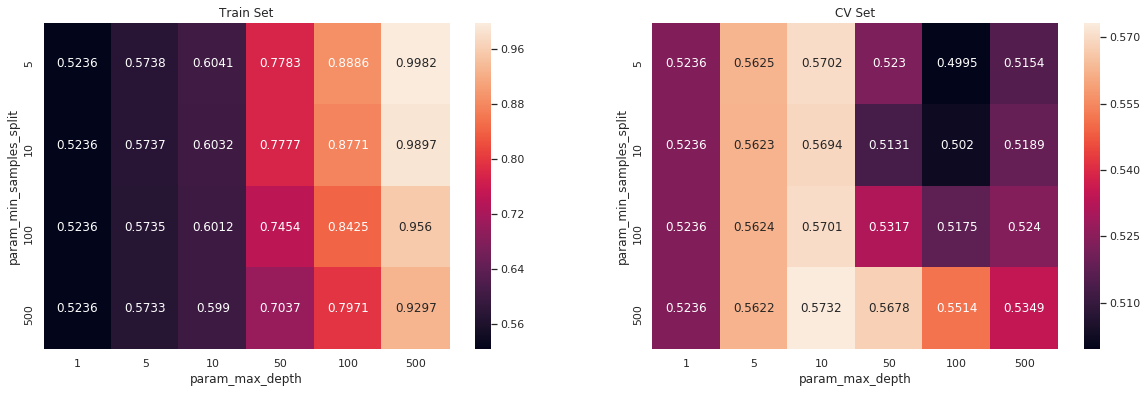

In [0]:
import seaborn as sns; sns.set()


max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

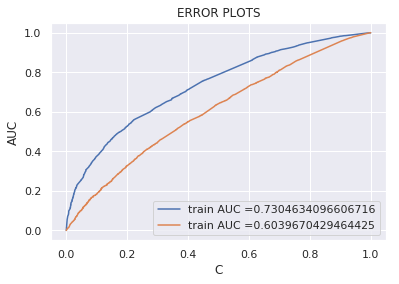

In [85]:
i = 30
j = 1000
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth= i, min_samples_split= j,
                                 max_features=None, max_leaf_nodes=None, class_weight= 'balanced' )
clf.fit(x_train, Y_train)
clf_s = CalibratedClassifierCV(clf, method='sigmoid',cv = 5)

clf_s.fit(x_train, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, clf_s.predict_proba(x_train)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, clf_s.predict_proba(x_test)[:,1])
y_train_pred_bow =clf_s.predict_proba(x_train)[:,1]
y_test_pred_bow = clf_s.predict_proba(x_test)[:,1]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
               
    predictions1 = predictions
    return predictions

####confusion matrix for test data

the maximum value of tpr*(1-fpr) 0.24999545197655595 for threshold 0.836
the maximum value of tpr*(1-fpr) 0.4389235608465932 for threshold 0.84


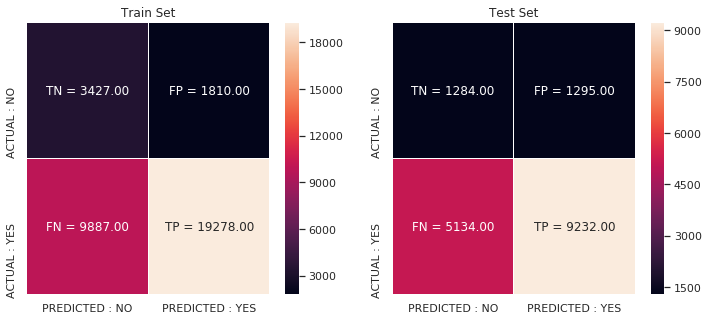

In [87]:
import seaborn as sns; sns.set()
b = confusion_matrix(Y_test, predict(y_test_pred_bow, te_thresholds, test_fpr, test_fpr))
a = confusion_matrix(Y_train, predict(y_train_pred_bow, tr_thresholds, train_fpr, train_tpr))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), a.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), b.flatten())])).reshape(2,2)

sns.heatmap(a, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(b, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()


###GraphViz

In [0]:
f_bow = ft_ss + ft_cc + ft_csc  + ft_pgc  + ft_bow_e + ft_bow_pt+ft_tp

In [0]:
f_bow.append('price')

In [0]:
f_bow.append('teacher_number_of_previously_posted_projects')

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=2)

In [0]:
clf = dtree.fit(x_train,Y_train)

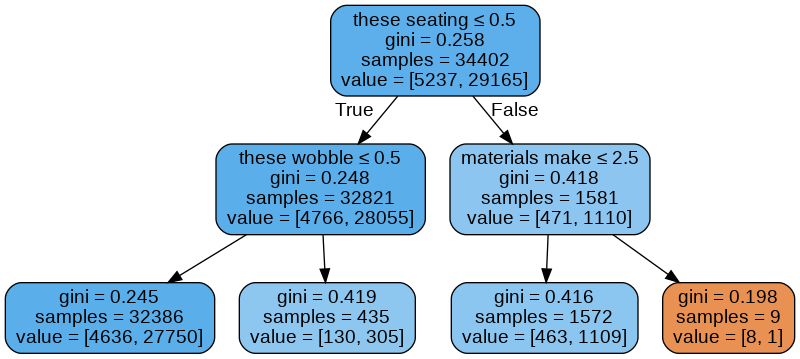

In [94]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=f_bow)
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

###Falsepositives and word cloud

In [95]:
y_test_pred_bow

array([0.84710218, 0.82778726, 0.85609873, ..., 0.84636   , 0.85665695,
       0.89072031])

In [96]:
predictions1

[1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,


In [0]:
fpi = []
for i in range(len(Y_test)) :
  if (Y_test[i] == 0) & (predictions1[i] == 1) :
    fpi.append(i)

In [98]:
len(fpi)

1558

In [99]:
len(X_test['essay'])

16945

In [0]:
fp_essay1 = [ ]
for i in fpi :
  fp_essay1.append(X_test['essay'][i])

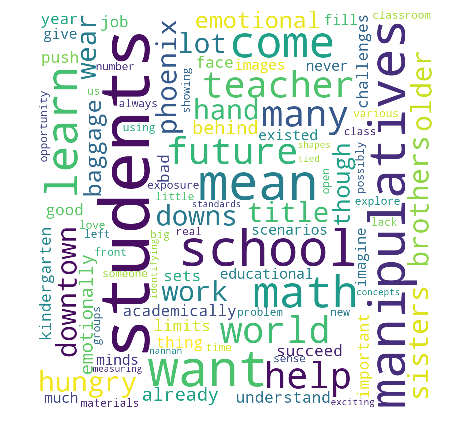

In [101]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
  
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
  
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 1).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

###BoxPlot

In [0]:
cols = X_test.columns
X_test_fp = pd.DataFrame(columns=cols)

In [0]:
for i in fpi :
  X_test_fp = X_test_fp.append(X_test.filter(items=[i], axis=0))

In [104]:
X_test_fp.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,project_title,price,quantity
2,107239,p171710,b4c1d71491f23b2a19fb6de3656722f9,Mrs.,MD,2016-08-21 11:20:11,Grades PreK-2,A child who reads will be an adult who thinks!...,Your generous donation will be put to great us...,NaN,NaN,My students need the Color All-in-One printer ...,0,Literacy_Language,Literacy Literature_Writing,a child reads adult thinks this i became eleme...,print read learn,158.37,3.0
10,133365,p029278,fe4da4a5e585ce52b317ca40dc679697,Ms.,OH,2016-12-06 22:57:29,Grades 6-8,My students are driven to achieve their best! ...,My students and I would greatly find benefit t...,NaN,NaN,My students need an iPad Air 2 to help assist ...,3,Literacy_Language SpecialNeeds,Literacy SpecialNeeds,my students driven achieve best they students ...,turning technology,NaN,NaN


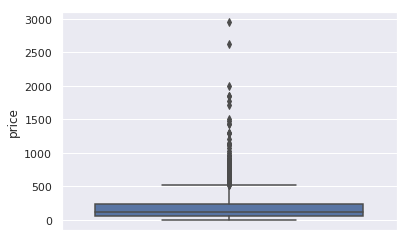

In [106]:
ax = sns.boxplot(y='price', data=X_test_fp)

###PDF

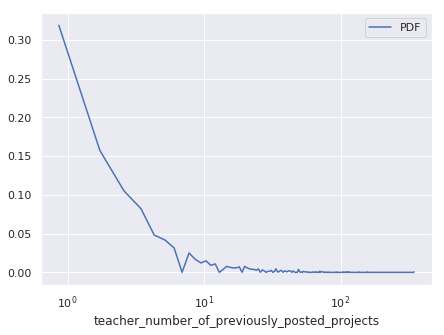

In [107]:
plt.figure(figsize=(7,5))

counts, bin_edges = np.histogram(X_test_fp['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)

pdf, = plt.plot(bin_edges[1:], pdf)

plt.legend([pdf], ["PDF"]) 
plt.xscale('log')
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()

###Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)


In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_b = TfidfVectorizer(min_df=10,ngram_range=(2,2), max_features=10000)
text_tfidf = vectorizer_tfidf_b.fit_transform(X_train['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf.shape)
text_tfidf_te = vectorizer_tfidf_b.transform(X_test['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf_te.shape)
text_tfidf_tecv = vectorizer_tfidf_b.transform(X_test_cv['essay'])
print("Shape of matrix after one hot encodig ",text_tfidf_tecv.shape)

ft_tfidf_e = vectorizer_tfidf_b.get_feature_names()
print(ft_tfidf_e)

Shape of matrix after one hot encodig  (34402, 10000)
Shape of matrix after one hot encodig  (16945, 10000)
Shape of matrix after one hot encodig  (8601, 10000)
['000 students', '10 students', '10 year', '10 years', '100 free', '100 percent', '100 students', '1000 students', '10th grade', '12 students', '12 years', '12th grade', '15 minutes', '15 students', '150 students', '18 students', '1st 2nd', '1st grade', '1st graders', '20 minutes', '20 students', '20 years', '200 students', '2016 2017', '2017 school', '21 students', '21st century', '22 students', '23 students', '24 students', '25 students', '26 students', '27 students', '28 students', '2nd 3rd', '2nd grade', '2nd graders', '30 minutes', '30 students', '300 students', '32 students', '35 students', '3d printer', '3d printing', '3rd 4th', '3rd 5th', '3rd grade', '3rd graders', '40 students', '400 students', '45 minutes', '4th 5th', '4th grade', '4th graders', '50 students', '500 students', '5th 6th', '5th grade', '5th graders', '6

In [110]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_t = TfidfVectorizer(min_df=10,ngram_range=(2,2), max_features=10000)
titles_tfidf = vectorizer_tfidf_t.fit_transform(X_train['project_title'])
print("Shape of matrix after one hot encodig ",titles_tfidf.shape)

titles_tfidf_te = vectorizer_tfidf_t.transform(X_test['project_title'])
print("Shape of matrix after one hot encodig ",titles_tfidf_te.shape)

titles_tfidf_tecv = vectorizer_tfidf_t.transform(X_test_cv['project_title'])
print("Shape of matrix after one hot encodig ",titles_tfidf_tecv.shape)

ft_tfidf_t = vectorizer_tfidf_t.get_feature_names()
print(ft_tfidf_t)


Shape of matrix after one hot encodig  (34402, 1110)
Shape of matrix after one hot encodig  (16945, 1110)
Shape of matrix after one hot encodig  (8601, 1110)
['1st grade', '1st graders', '2016 2017', '21st century', '2nd grade', '2nd graders', '3d printer', '3d printing', '3rd grade', '3rd graders', '4th grade', '4th graders', '5th grade', '5th graders', '6th grade', '8th grade', 'about it', 'about our', 'about reading', 'about that', 'academic success', 'active bodies', 'active kids', 'active learners', 'active learning', 'active minds', 'active play', 'active seating', 'active students', 'after flood', 'after school', 'all aboard', 'all about', 'all around', 'all day', 'all hands', 'all learners', 'all students', 'alternative seating', 'an apple', 'an ipad', 'and learn', 'apple day', 'are not', 'are on', 'are ready', 'are you', 'around us', 'around world', 'art class', 'art room', 'art science', 'art supplies', 'art technology', 'at our', 'at time', 'atpe member', 'autism classroom',

### 2.4.1 Combining all features,TFIDF <font color='red'> SET 2</font>

In [111]:
from scipy.sparse import hstack
#with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_tfidf= hstack(( categories_one_hot,sub_categories_one_hot,teacher_prefix_one_hot,school_state_one_hot,project_grade_category_one_hot,train_tnpp,text_tfidf,titles_tfidf,price_normalized)).tocsr()
#x_train = x_train.toarray()
#x_train[np.isnan(x_train)] = np.median(x_train[~np.isnan(x_train)])
x_train_tfidf.shape

(34402, 11211)

In [112]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_tfidf= hstack((categories_one_hot_te, sub_categories_one_hot_te,teacher_prefix_one_hot_te,school_state_one_hot_te,test_tnpp,project_grade_category_one_hot_te,text_tfidf_te,titles_tfidf_te,price_normalized_te)).tocsr()
#x_test = x_test.toarray()
#x_test[np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])
x_test_tfidf.shape

(16945, 11211)

In [113]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_tfidf_cv= hstack((categories_one_hot_tecv, sub_categories_one_hot_tecv,teacher_prefix_one_hot_tecv,test_cv_tnpp,school_state_one_hot_tecv,project_grade_category_one_hot_tecv,text_tfidf_tecv,titles_tfidf_tecv,price_normalized_tecv)).tocsr()
#x_test_cv= x_test_cv.toarray()
#x_test_cv[np.isnan(x_test_cv)] = np.median(x_test_cv[~np.isnan(x_test_cv)])
x_test_tfidf_cv.shape

(8601, 11211)

In [114]:
print("Final Data matrix")
print(x_train_tfidf.shape, Y_train.shape)
print(x_test_tfidf_cv.shape, Y_test_cv.shape)
print(x_test_tfidf.shape, Y_test.shape)

Final Data matrix
(34402, 11211) (34402,)
(8601, 11211) (8601,)
(16945, 11211) (16945,)


###Decision Trees on tfidf





In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()


parameters = {'max_depth':[1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}

clf1 = GridSearchCV(dt1, parameters, cv=3,scoring='roc_auc')
se1 = clf1.fit(x_train_tfidf, Y_train)

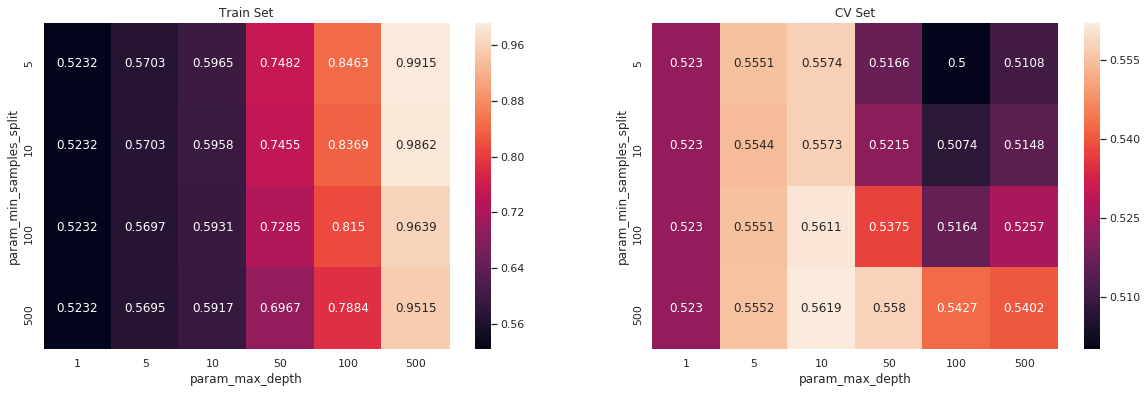

In [0]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

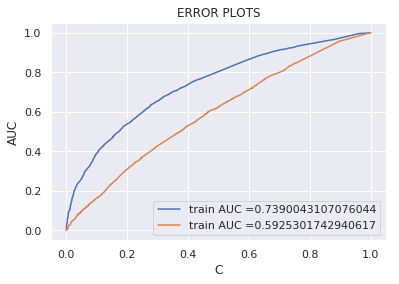

In [151]:
i = 30
j = 1200
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth= i, min_samples_split= j,
                                 max_features=None, max_leaf_nodes=None, class_weight= 'balanced' )
clf.fit(x_train_tfidf, Y_train)
clf_s = CalibratedClassifierCV(clf, method='sigmoid',cv = 5)
clf_s.fit(x_train_tfidf, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, clf_s.predict_proba(x_train_tfidf)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, clf_s.predict_proba(x_test_tfidf)[:,1])
y_train_pred_tfidf = clf_s.predict_proba(x_train_tfidf)[:,1]
y_test_pred_tfidf = clf_s.predict_proba(x_test_tfidf)[:,1]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

the maximum value of tpr*(1-fpr) 0.2499990603257347 for threshold 0.833
the maximum value of tpr*(1-fpr) 0.46035116352375544 for threshold 0.835


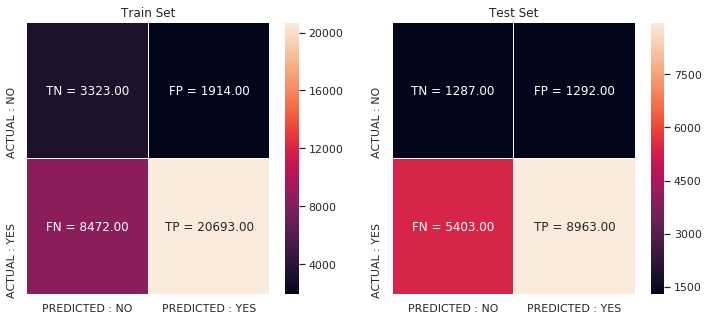

In [152]:
import seaborn as sns; sns.set()
b = confusion_matrix(Y_test, predict(y_test_pred_tfidf, te_thresholds, test_fpr, test_fpr))
a = confusion_matrix(Y_train, predict(y_train_pred_tfidf, tr_thresholds, train_fpr, train_tpr))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), a.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), b.flatten())])).reshape(2,2)

sns.heatmap(a, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(b, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()


###GraphViz

In [0]:
f_tfidf = ft_ss + ft_cc + ft_csc  + ft_pgc  + ft_tfidf_e + ft_tfidf_t+ft_tp

In [0]:
f_tfidf.append('price')

In [0]:
f_tfidf.append('teacher_number_of_previously_posted_projects')

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=2)

In [0]:
clf = dtree.fit(x_train_tfidf,Y_train)

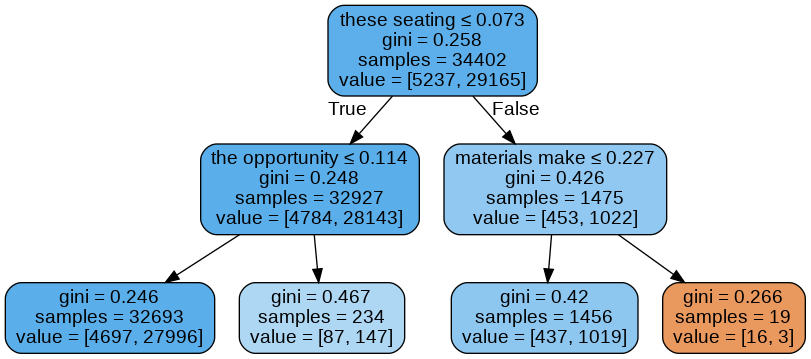

In [158]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=f_tfidf)
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

###Falsepositives 

In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
               
    predictions1 = predictions
    return predictions

In [124]:
y_test_pred_tfidf

array([0.89801412, 0.81435167, 0.85886943, ..., 0.85886943, 0.83327503,
       0.87662813])

In [161]:
predictions1

[1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,


In [0]:
fpi = []
for i in range(len(Y_test)) :
  if (Y_test[i] == 0) & (predictions1[i] == 1) :
    fpi.append(i)

In [163]:
len(fpi)

1668

In [164]:
len(X_test['essay'])

16945

In [0]:
fp_essay1 = [ ]
for i in fpi :
  fp_essay1.append(X_test['essay'][i])

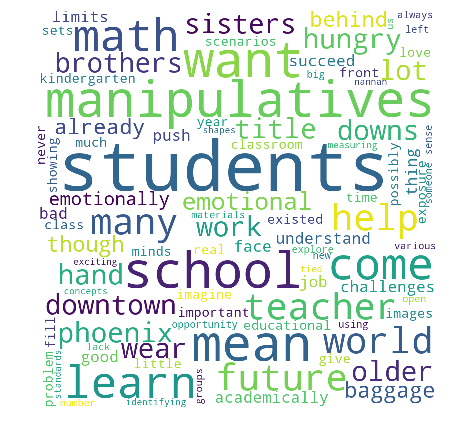

In [166]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
  
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
  
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 1).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

###BoxPlot

In [0]:
cols = X_test.columns
X_test_fp = pd.DataFrame(columns=cols)

In [0]:
for i in fpi :
  X_test_fp = X_test_fp.append(X_test.filter(items=[i], axis=0))

In [169]:
X_test_fp.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,project_title,price,quantity
10,133365,p029278,fe4da4a5e585ce52b317ca40dc679697,Ms.,OH,2016-12-06 22:57:29,Grades 6-8,My students are driven to achieve their best! ...,My students and I would greatly find benefit t...,NaN,NaN,My students need an iPad Air 2 to help assist ...,3,Literacy_Language SpecialNeeds,Literacy SpecialNeeds,my students driven achieve best they students ...,turning technology,NaN,NaN
20,181532,p214065,803c580b9ddabc5c899cde1edc95b868,Mr.,PA,2016-12-16 23:53:21,Grades 9-12,I service the needs of special education stude...,This technology provides a platform for studen...,NaN,NaN,My students need new technology to do research...,7,Literacy_Language SpecialNeeds,Literacy SpecialNeeds,i service needs special education students 10t...,technology alternative classroom experience,617.99,1.0
24,125767,p199350,0fc7344e1d3a5cf0043b8308f6bf7632,Mr.,WI,2016-10-06 12:39:50,Grades 9-12,I have some students who love the world of com...,The students will have access to some of the s...,NaN,NaN,"My students need the Amazon Echo, Phillips Hue...",11,AppliedLearning,College_CareerPrep Other,i students love world computer science cool ex...,making our classroom smart automated,119.98,3.0


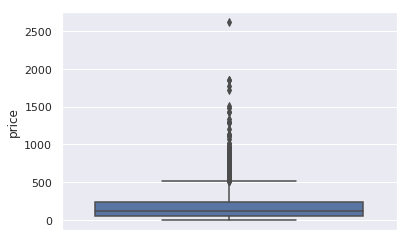

In [171]:
ax = sns.boxplot(y='price', data=X_test_fp)

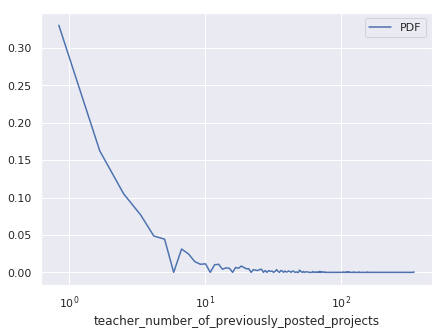

In [172]:
plt.figure(figsize=(7,5))

counts, bin_edges = np.histogram(X_test_fp['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)

pdf, = plt.plot(bin_edges[1:], pdf)

plt.legend([pdf], ["PDF"]) 
plt.xscale('log')
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()

# 1.5.2.3 Using Pretrained Models: Avg W2V

In [173]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp "/content/gdrive/My Drive/glove.42B.300d.txt" "glove.42B.300d.txt"

In [177]:
# Reading glove vecors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')



329739it [00:36, 9132.50it/s]

Done. 329739  words loaded!



1758it [00:00, 8634.04it/s]

Loading Glove Model


329739it [00:36, 8946.50it/s]


Done. 329739  words loaded!


In [178]:
words = []
for i in preprocessed_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))




all the words in the coupus 222927
the unique words in the coupus 11963
The number of words that are present in both glove vectors and our coupus 10910 ( 91.198 %)
word 2 vec length 10910


In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove.42B.300d.txt', 'wb') as f:
    pickle.dump(words_courpus, f)

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove.42B.300d.txt', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [181]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 34402/34402 [00:12<00:00, 2769.31it/s]

34402
300


In [182]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_tecv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_cv['essay']): # for each review/sentence
    vector_tecv = np.zeros(300) # as word vectors are of zero length
    cnt_words_tecv =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_tecv += model[word]
            cnt_words_tecv += 1
    if cnt_words_tecv != 0:
        vector_tecv /= cnt_words_tecv
    avg_w2v_vectors_tecv.append(vector_tecv)

print(len(avg_w2v_vectors_tecv))
print(len(avg_w2v_vectors_tecv[0]))

100%|██████████| 8601/8601 [00:02<00:00, 2969.85it/s]

8601
300


In [183]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector_te = np.zeros(300) # as word vectors are of zero length
    cnt_words_te =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_te += model[word]
            cnt_words_te += 1
    if cnt_words_te != 0:
        vector_te /= cnt_words_te
    avg_w2v_vectors_te.append(vector_te)

print(len(avg_w2v_vectors_te))
print(len(avg_w2v_vectors_te[0]))

100%|██████████| 16945/16945 [00:05<00:00, 2964.56it/s]

16945
300


In [184]:
# average Word2Vec
# compute average word2vec for preprocessed_titles.
avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector_titles = np.zeros(300) # as word vectors are of zero length
    cnt_words_titles =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_titles += model[word]
            cnt_words_titles += 1
    if cnt_words_titles != 0:
        vector_titles /= cnt_words_titles
    avg_w2v_vectors_titles.append(vector_titles)

print(len(avg_w2v_vectors_titles))
print(len(avg_w2v_vectors_titles[0]))

100%|██████████| 34402/34402 [00:00<00:00, 55313.03it/s]

34402
300


In [185]:
# average Word2Vec
# compute average word2vec for preprocessed_titles.
avg_w2v_vectors_titles_tecv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_cv['project_title']): # for each review/sentence
    vector_titles_tecv = np.zeros(300) # as word vectors are of zero length
    cnt_words_titles_tecv =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_titles_tecv += model[word]
            cnt_words_titles_tecv += 1
    if cnt_words_titles_tecv != 0:
        vector_titles_tecv /= cnt_words_titles_tecv
    avg_w2v_vectors_titles_tecv.append(vector_titles_tecv)

print(len(avg_w2v_vectors_titles_tecv))
print(len(avg_w2v_vectors_titles_tecv[0]))

100%|██████████| 8601/8601 [00:00<00:00, 54121.15it/s]

8601
300


In [186]:
# average Word2Vec
# compute average word2vec for preprocessed_titles.
avg_w2v_vectors_titles_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector_titles_te = np.zeros(300) # as word vectors are of zero length
    cnt_words_titles_te =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector_titles_te += model[word]
            cnt_words_titles_te += 1
    if cnt_words_titles_te != 0:
        vector_titles_te /= cnt_words_titles_te
    avg_w2v_vectors_titles_te.append(vector_titles_te)

print(len(avg_w2v_vectors_titles_te))
print(len(avg_w2v_vectors_titles_te[0]))

100%|██████████| 16945/16945 [00:00<00:00, 53689.85it/s]

16945
300


### 2.4.1 Combining all features,<font color='red'>word 2 vec</font>

In [187]:
from scipy.sparse import hstack
#with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_w2v= hstack(( categories_one_hot,sub_categories_one_hot,teacher_prefix_one_hot,school_state_one_hot,train_tnpp,project_grade_category_one_hot,avg_w2v_vectors,avg_w2v_vectors_titles,price_normalized)).tocsr()
#x_train = x_train.toarray()
#x_train[np.isnan(x_train)] = np.median(x_train[~np.isnan(x_train)])
x_train_w2v.shape

(34402, 701)

In [188]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_w2v= hstack((categories_one_hot_te, sub_categories_one_hot_te,teacher_prefix_one_hot_te,test_tnpp,school_state_one_hot_te,project_grade_category_one_hot_te,avg_w2v_vectors_te,avg_w2v_vectors_titles_te,price_normalized_te)).tocsr()
#x_test = x_test.toarray()
#x_test[np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])
x_test_w2v.shape

(16945, 701)

In [189]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_w2v_cv= hstack((categories_one_hot_tecv, sub_categories_one_hot_tecv,teacher_prefix_one_hot_tecv,test_cv_tnpp,school_state_one_hot_tecv,project_grade_category_one_hot_tecv,avg_w2v_vectors_tecv,avg_w2v_vectors_titles_tecv,price_normalized_tecv)).tocsr()
#x_test_cv= x_test_cv.toarray()
#x_test_cv[np.isnan(x_test_cv)] = np.median(x_test_cv[~np.isnan(x_test_cv)])
x_test_w2v_cv.shape

(8601, 701)

In [190]:
print("Final Data matrix")
print(x_train_w2v.shape, Y_train.shape)
print(x_test_w2v_cv.shape, Y_test_cv.shape)
print(x_test_w2v.shape, Y_test.shape)

Final Data matrix
(34402, 701) (34402,)
(8601, 701) (8601,)
(16945, 701) (16945,)


###Decision Trees using avg W2v

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()


parameters = {'max_depth':[1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}

clf1 = GridSearchCV(dt1, parameters, cv=3,scoring='roc_auc')
se1 = clf1.fit(x_train_w2v, Y_train)

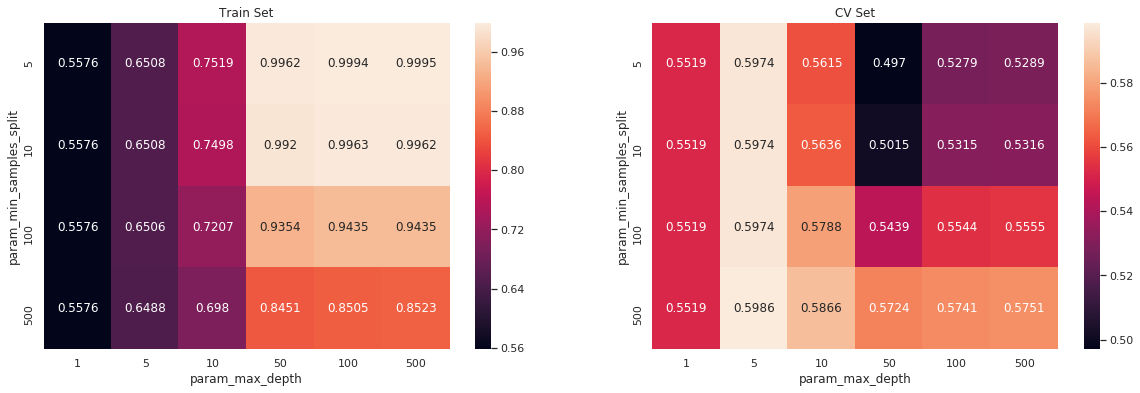

In [0]:
import seaborn as sns; sns.set()


max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

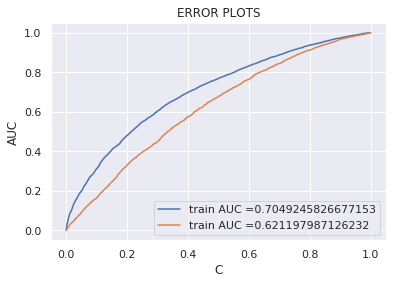

In [208]:
i = 20
j = 1000
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth= i, min_samples_split= j,
                                 max_features=None, max_leaf_nodes=None, class_weight= 'balanced' )
clf.fit(x_train_w2v, Y_train)
clf_s = CalibratedClassifierCV(clf, method='isotonic',cv = 3)
clf_s.fit(x_train_w2v, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
train_fpr, train_tpr, thresholds_tr = roc_curve(Y_train, clf_s.predict_proba(x_train_w2v)[:,1])
test_fpr, test_tpr, thresholds_te = roc_curve(Y_test, clf_s.predict_proba(x_test_w2v)[:,1])
y_pred_train_w2v = clf_s.predict_proba(x_train_w2v)[:,1]
y_pred_test_w2v = clf_s.predict_proba(x_test_w2v)[:,1]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


the maximum value of tpr*(1-fpr) 0.24999966171726448 for threshold 0.839
the maximum value of tpr*(1-fpr) 0.42780205896923346 for threshold 0.844


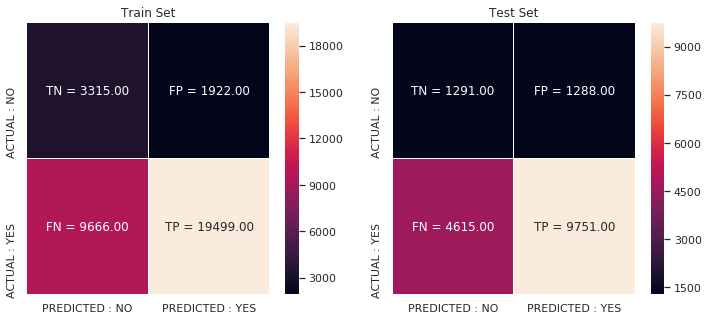

In [192]:
import seaborn as sns; sns.set()
b = confusion_matrix(Y_test, predict(y_pred_test_w2v, thresholds_te, test_fpr, test_fpr))
a = confusion_matrix(Y_train, predict(y_pred_train_w2v, thresholds_tr, train_fpr, train_tpr))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), a.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), b.flatten())])).reshape(2,2)

sns.heatmap(a, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(b, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()


In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
               
    predictions1 = predictions
    return predictions

###Falsepositives 

In [194]:
y_pred_test_w2v

array([0.84335466, 0.80972264, 0.85679954, ..., 0.87093781, 0.88178976,
       0.85774697])

In [195]:
predictions1

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,


In [0]:
fpi = []
for i in range(len(Y_test)) :
  if (Y_test[i] == 0) & (predictions1[i] == 1) :
    fpi.append(i)

In [197]:
len(fpi)

1608

In [0]:
fp_essay1 = [ ]
for i in fpi :
  fp_essay1.append(X_test['essay'][i])

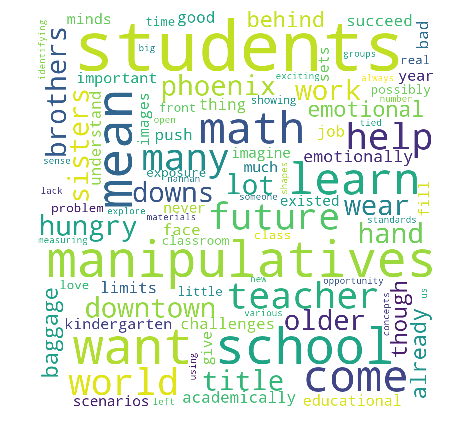

In [199]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
  
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
  
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 1).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

###BoxPlot

In [0]:
cols = X_test.columns
X_test_fp = pd.DataFrame(columns=cols)

In [0]:
for i in fpi :
  X_test_fp = X_test_fp.append(X_test.filter(items=[i], axis=0))

In [202]:
X_test_fp.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,project_title,price,quantity
10,133365,p029278,fe4da4a5e585ce52b317ca40dc679697,Ms.,OH,2016-12-06 22:57:29,Grades 6-8,My students are driven to achieve their best! ...,My students and I would greatly find benefit t...,NaN,NaN,My students need an iPad Air 2 to help assist ...,3,Literacy_Language SpecialNeeds,Literacy SpecialNeeds,my students driven achieve best they students ...,turning technology,NaN,NaN
20,181532,p214065,803c580b9ddabc5c899cde1edc95b868,Mr.,PA,2016-12-16 23:53:21,Grades 9-12,I service the needs of special education stude...,This technology provides a platform for studen...,NaN,NaN,My students need new technology to do research...,7,Literacy_Language SpecialNeeds,Literacy SpecialNeeds,i service needs special education students 10t...,technology alternative classroom experience,617.99,1.0
24,125767,p199350,0fc7344e1d3a5cf0043b8308f6bf7632,Mr.,WI,2016-10-06 12:39:50,Grades 9-12,I have some students who love the world of com...,The students will have access to some of the s...,NaN,NaN,"My students need the Amazon Echo, Phillips Hue...",11,AppliedLearning,College_CareerPrep Other,i students love world computer science cool ex...,making our classroom smart automated,119.98,3.0


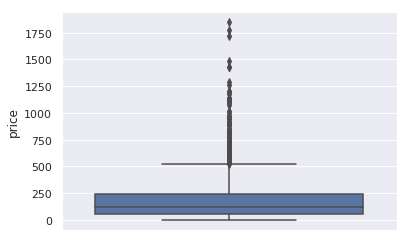

In [209]:
ax = sns.boxplot(y='price', data=X_test_fp)

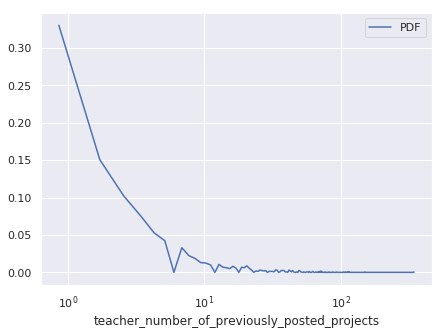

In [210]:
plt.figure(figsize=(7,5))

counts, bin_edges = np.histogram(X_test_fp['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)

pdf, = plt.plot(bin_edges[1:], pdf)

plt.legend([pdf], ["PDF"]) 
plt.xscale('log')
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()

###categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_eassay (TFIDF W2V)


In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [212]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_tr.append(vector)

print(len(tfidf_w2v_vectors_tr))
print(len(tfidf_w2v_vectors_tr[0]))

100%|██████████| 34402/34402 [01:08<00:00, 501.67it/s]

34402
300


In [0]:
tfidf_w2v_e = tfidf_w2v_vectors_tr

In [214]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_te.append(vector)

print(len(tfidf_w2v_vectors_te))
print(len(tfidf_w2v_vectors_te[0]))

100%|██████████| 16945/16945 [00:33<00:00, 509.40it/s]

16945
300


In [215]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_tecv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_tecv.append(vector)

print(len(tfidf_w2v_vectors_tecv))
print(len(tfidf_w2v_vectors_tecv[0]))

100%|██████████| 8601/8601 [00:17<00:00, 497.85it/s]

8601
300


###project titles

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [217]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_ttr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_ttr.append(vector)

print(len(tfidf_w2v_vectors_ttr))
print(len(tfidf_w2v_vectors_ttr[0]))

100%|██████████| 34402/34402 [00:01<00:00, 23023.98it/s]

34402
300


In [0]:
tfidf_w2v_t = tfidf_w2v_vectors_ttr

In [219]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_tte = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_tte.append(vector)

print(len(tfidf_w2v_vectors_tte))
print(len(tfidf_w2v_vectors_tte[0]))

100%|██████████| 16945/16945 [00:00<00:00, 24370.53it/s]

16945
300


In [220]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_ttecv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_ttecv.append(vector)

print(len(tfidf_w2v_vectors_ttecv))
print(len(tfidf_w2v_vectors_ttecv[0]))

100%|██████████| 8601/8601 [00:00<00:00, 24887.47it/s]

8601
300


### 2.4.1 Combining all features,<font color='red'>tfidf word 2 vec</font>

In [221]:
from scipy.sparse import hstack
#with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_tfidf_w2v= hstack(( categories_one_hot,sub_categories_one_hot,teacher_prefix_one_hot,train_tnpp,school_state_one_hot,project_grade_category_one_hot,tfidf_w2v_vectors_tr,tfidf_w2v_vectors_ttr,price_normalized)).tocsr()
#x_train = x_train.toarray()
#x_train[np.isnan(x_train)] = np.median(x_train[~np.isnan(x_train)])
x_train_tfidf_w2v.shape

(34402, 701)

In [222]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_tfidf_w2v= hstack((categories_one_hot_te, sub_categories_one_hot_te,teacher_prefix_one_hot_te,test_tnpp,school_state_one_hot_te,project_grade_category_one_hot_te,tfidf_w2v_vectors_te,tfidf_w2v_vectors_tte,price_normalized_te)).tocsr()
#x_test = x_test.toarray()
#x_test[np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])
x_test_tfidf_w2v.shape

(16945, 701)

In [223]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_test_tfidf_w2v_cv= hstack((categories_one_hot_tecv, sub_categories_one_hot_tecv,teacher_prefix_one_hot_tecv,test_cv_tnpp,school_state_one_hot_tecv,project_grade_category_one_hot_tecv,tfidf_w2v_vectors_tecv,tfidf_w2v_vectors_ttecv,price_normalized_tecv)).tocsr()
#x_test_cv= x_test_cv.toarray()
#x_test_cv[np.isnan(x_test_cv)] = np.median(x_test_cv[~np.isnan(x_test_cv)])
x_test_tfidf_w2v_cv.shape

(8601, 701)

In [224]:
print("Final Data matrix")
print(x_train_tfidf_w2v.shape, Y_train.shape)
print(x_test_tfidf_w2v_cv.shape, Y_test_cv.shape)
print(x_test_tfidf_w2v.shape, Y_test.shape)

Final Data matrix
(34402, 701) (34402,)
(8601, 701) (8601,)
(16945, 701) (16945,)


###Decision Trees using TfIdf W2v

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()


parameters = {'max_depth':[1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}

clf1 = GridSearchCV(dt1, parameters, cv=3,scoring='roc_auc')
se1 = clf1.fit(x_train_tfidf_w2v, Y_train)

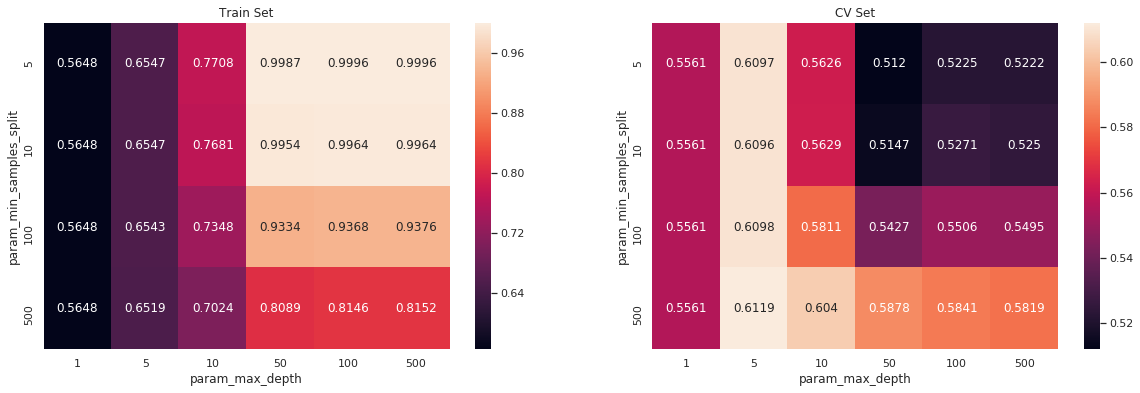

In [0]:
import seaborn as sns; sns.set()


max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

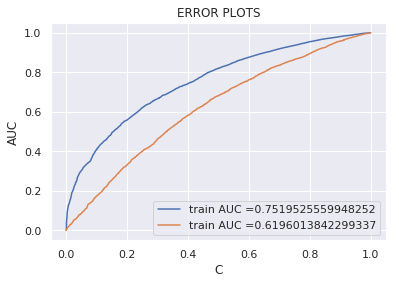

In [242]:
i = 15
j = 500
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth= i, min_samples_split= j,
                                 max_features=None, max_leaf_nodes=None, class_weight= 'balanced')
clf.fit(x_train_tfidf_w2v, Y_train)
clf_s = CalibratedClassifierCV(clf, method='isotonic',cv = 3)
clf_s.fit(x_train_tfidf_w2v, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, clf_s.predict_proba(x_train_tfidf_w2v)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, clf_s.predict_proba(x_test_tfidf_w2v)[:,1])
y_train_pred_tfidfw2v=clf_s.predict_proba(x_train_tfidf_w2v)[:,1]
y_test_pred_tfidfw2v = clf_s.predict_proba(x_test_tfidf_w2v)[:,1]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


the maximum value of tpr*(1-fpr) 0.2499990603257347 for threshold 0.84
the maximum value of tpr*(1-fpr) 0.4684105214643161 for threshold 0.836


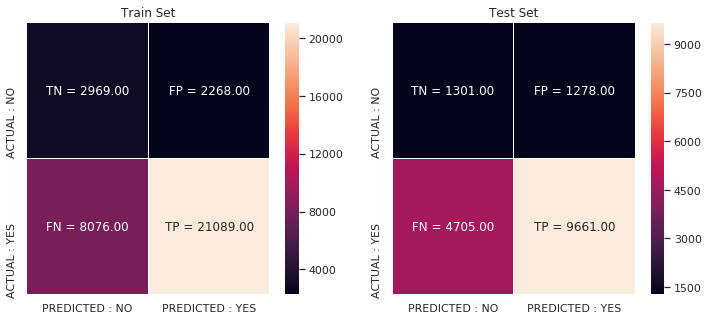

In [243]:
import seaborn as sns; sns.set()
b = confusion_matrix(Y_test, predict(y_pred_test_w2v, thresholds_te, test_fpr, test_fpr))
a = confusion_matrix(Y_train, predict(y_pred_train_w2v, thresholds_tr, train_fpr, train_tpr))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), a.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), b.flatten())])).reshape(2,2)

sns.heatmap(a, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(b, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()


In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    
    predictions1 = predictions
    return predictions

###Falsepositives 

In [246]:
y_test_pred_tfidfw2v

array([0.76551183, 0.84797646, 0.85774267, ..., 0.85817556, 0.83036988,
       0.87913949])

In [247]:
predictions1

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,


In [0]:
fpi = []
for i in range(len(Y_test)) :
  if (Y_test[i] == 0) & (predictions1[i] == 1) :
    fpi.append(i)

In [249]:
len(fpi)

1771

In [0]:
fp_essay1 = [ ]
for i in fpi :
  fp_essay1.append(X_test['essay'][i])

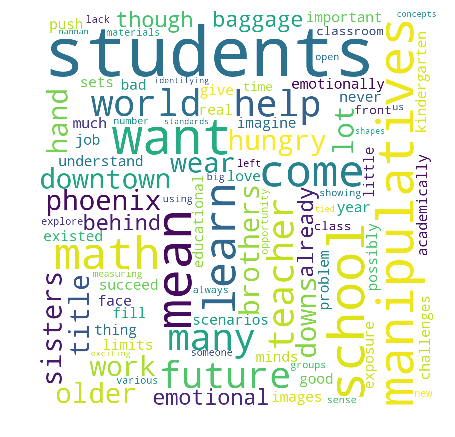

In [251]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
  
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
  
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 1).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

###BoxPlot

In [0]:
cols = X_test.columns
X_test_fp = pd.DataFrame(columns=cols)

In [0]:
for i in fpi :
  X_test_fp = X_test_fp.append(X_test.filter(items=[i], axis=0))

In [254]:
X_test_fp.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,project_title,price,quantity
10,133365,p029278,fe4da4a5e585ce52b317ca40dc679697,Ms.,OH,2016-12-06 22:57:29,Grades 6-8,My students are driven to achieve their best! ...,My students and I would greatly find benefit t...,NaN,NaN,My students need an iPad Air 2 to help assist ...,3,Literacy_Language SpecialNeeds,Literacy SpecialNeeds,my students driven achieve best they students ...,turning technology,NaN,NaN
20,181532,p214065,803c580b9ddabc5c899cde1edc95b868,Mr.,PA,2016-12-16 23:53:21,Grades 9-12,I service the needs of special education stude...,This technology provides a platform for studen...,NaN,NaN,My students need new technology to do research...,7,Literacy_Language SpecialNeeds,Literacy SpecialNeeds,i service needs special education students 10t...,technology alternative classroom experience,617.99,1.0
24,125767,p199350,0fc7344e1d3a5cf0043b8308f6bf7632,Mr.,WI,2016-10-06 12:39:50,Grades 9-12,I have some students who love the world of com...,The students will have access to some of the s...,NaN,NaN,"My students need the Amazon Echo, Phillips Hue...",11,AppliedLearning,College_CareerPrep Other,i students love world computer science cool ex...,making our classroom smart automated,119.98,3.0


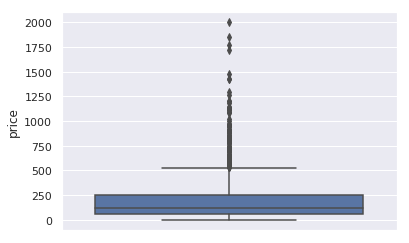

In [256]:
ax = sns.boxplot(y='price', data=X_test_fp)

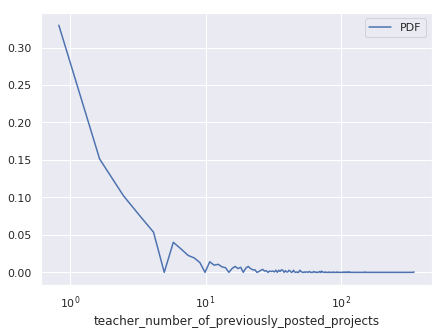

In [257]:
plt.figure(figsize=(7,5))

counts, bin_edges = np.histogram(X_test_fp['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)

pdf, = plt.plot(bin_edges[1:], pdf)

plt.legend([pdf], ["PDF"]) 
plt.xscale('log')
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()

###Top 5000 features

In [0]:
# https://datascience.stackexchange.com/questions/6683/feature-selection-using-feature-importances-in-random-forests-with-scikit-learn

def selectKImportance(model, X, k=5):
     return X[:,model.feature_importances_.argsort()[::-1][:k]]

In [0]:
X_train_new = selectKImportance(clf, x_train, 5000)
X_test_new = selectKImportance(clf, x_test, 5000)
X_test_cv_new = selectKImportance(clf, x_test_cv, 5000)

In [261]:
X_test_new[0]

<1x701 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [281]:
C = [10 ** x for x in range(-8, 5)] # hyperparam for SGD classifier.
from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

for i in C:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf.fit(X_train_new, Y_train)
    clf_s = CalibratedClassifierCV(clf, method='sigmoid',cv = 5)
    clf_s.fit(X_train_new, Y_train)
    y_train_pred =  clf_s.predict_proba(X_train_new)[:,1]
    y_cv_pred =  clf_s.predict_proba(X_test_cv_new)[:,1]
    train_auc_score = roc_auc_score(Y_train,y_train_pred)
    train_auc.append((train_auc_score))
    cv_auc.append(roc_auc_score(Y_test_cv, y_cv_pred))
    cv_auc_score=roc_auc_score(Y_test_cv, y_cv_pred)
    print("C",i,"cv:",cv_auc_score,"train:",train_auc_score)


C 1e-08 cv: 0.5735632739987351 train: 0.5964486821980814
C 1e-07 cv: 0.5824421770301059 train: 0.6008882648391168
C 1e-06 cv: 0.5801478968419272 train: 0.5994098683486242
C 1e-05 cv: 0.5871876887413644 train: 0.6013512826500149
C 0.0001 cv: 0.5954688322759574 train: 0.6151711268849832
C 0.001 cv: 0.6288034217631715 train: 0.6403162479739288
C 0.01 cv: 0.59494267355039 train: 0.6002607486897176
C 0.1 cv: 0.5709768871080927 train: 0.5736176680839932
C 1 cv: 0.5716192570426947 train: 0.5729013391997969
C 10 cv: 0.571626182864092 train: 0.5729044163826464
C 100 cv: 0.5716260810137773 train: 0.5729053002543161
C 1000 cv: 0.5716260810137773 train: 0.5729053002543161
C 10000 cv: 0.5716260810137773 train: 0.5729053002543161


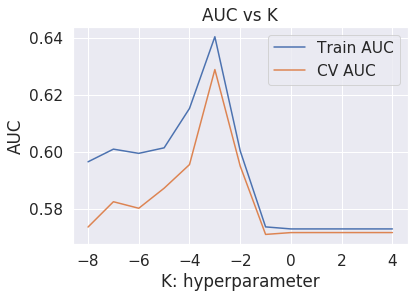

In [282]:
import math
log_a = [math.log10(num) for num in C]
plt.plot( log_a,train_auc, label='Train AUC')
plt.plot( log_a,cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC vs K")
plt.show()


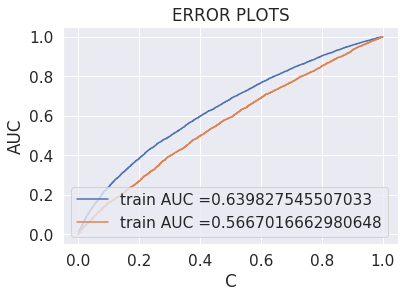

In [284]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = SGDClassifier(alpha=0.001, penalty='l2', loss='hinge',random_state = 0,class_weight = 'balanced')
clf.fit(x_train, Y_train)
clf_s = CalibratedClassifierCV(clf, method='sigmoid')
clf_s.fit(X_train_new, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, clf_s.predict_proba(X_train_new)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, clf_s.predict_proba(X_test_new)[:,1])
y_train_pred_new=clf_s.predict_proba(X_train_new)[:,1]
y_test_pred_new=clf_s.predict_proba(X_test_new)[:,1]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

confusion matrix on test data


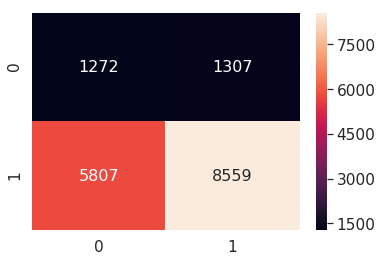

In [286]:
print("confusion matrix on test data")
a = confusion_matrix(Y_test, predict(y_test_pred_new, te_thresholds, test_fpr, test_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for test data we can say that,**

   **2755+17810 = 20565  pouns are correctly classified**
**and 12783+2704 = 15487 points are wrongly classified**

confusion matrix on train data


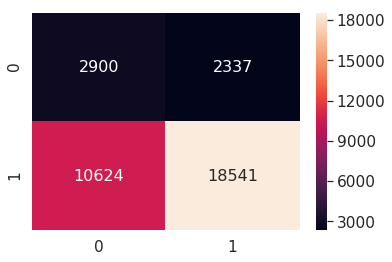

In [287]:
print("confusion matrix on train data")
a = confusion_matrix(Y_train, predict(y_train_pred_new, tr_thresholds, train_fpr, train_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


* **From the confusion matrix  for train data we can say that,**

   **6334+33366 = 39700  pouns are correctly classified**
**and 28747+4749 =33496 points are wrongly classified**

In [288]:
C = [10 ** x for x in range(-8, 5)] # hyperparam for SGD classifier.
from sklearn.metrics import roc_auc_score

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# 
train_auc = []
cv_auc = []

for i in C:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf.fit(X_train_new, Y_train)
    clf_s = CalibratedClassifierCV(clf, method='sigmoid',cv = 3)
    clf_s.fit(X_train_new, Y_train)
    y_train_pred =  clf_s.predict_proba(X_train_new)[:,1]
    y_cv_pred =  clf_s.predict_proba(X_test_cv_new)[:,1]
    train_auc_score = roc_auc_score(Y_train,y_train_pred)
    train_auc.append((train_auc_score))
    cv_auc.append(roc_auc_score(Y_test_cv, y_cv_pred))
    cv_auc_score=roc_auc_score(Y_test_cv, y_cv_pred)
    print("C",i,"cv:",cv_auc_score,"train:",train_auc_score)


C 1e-08 cv: 0.5755032169421888 train: 0.5761569200882785
C 1e-07 cv: 0.5837856845308724 train: 0.6016227883853109
C 1e-06 cv: 0.5763215842205344 train: 0.6019389852910987
C 1e-05 cv: 0.5783919974170759 train: 0.6107316391783123
C 0.0001 cv: 0.5905183468064324 train: 0.6318143714980062
C 0.001 cv: 0.5892257644629992 train: 0.5912007236224622
C 0.01 cv: 0.5508151080682764 train: 0.553337504334654
C 0.1 cv: 0.5 train: 0.5
C 1 cv: 0.5 train: 0.5
C 10 cv: 0.5 train: 0.5
C 100 cv: 0.5 train: 0.5
C 1000 cv: 0.5 train: 0.5
C 10000 cv: 0.5 train: 0.5


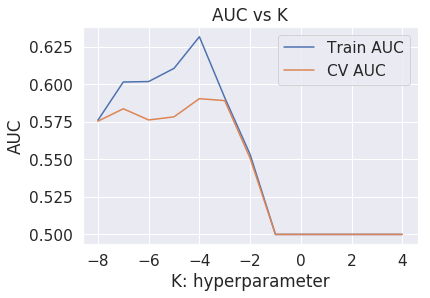

In [289]:
import math
log_a = [math.log10(num) for num in C]
plt.plot( log_a,train_auc, label='Train AUC')
plt.plot( log_a,cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC vs K")
plt.show()


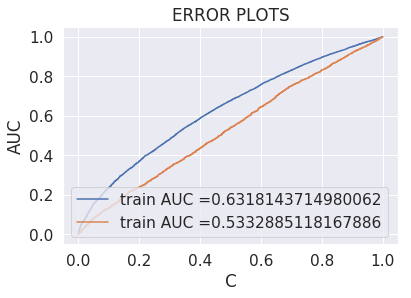

In [290]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
clf = SGDClassifier(alpha=0.0001, penalty='l1', loss='hinge',random_state = 0,class_weight = 'balanced')
clf.fit(x_train, Y_train)
clf_s = CalibratedClassifierCV(clf, method='sigmoid')
clf_s.fit(X_train_new, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of thepositive class
# not the predicted outputs
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, clf_s.predict_proba(X_train_new)[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, clf_s.predict_proba(X_test_new)[:,1])
y_train_pred_new=clf_s.predict_proba(X_train_new)[:,1]
y_test_pred_new=clf_s.predict_proba(X_test_new)[:,1]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()


In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

confusion matrix on test data


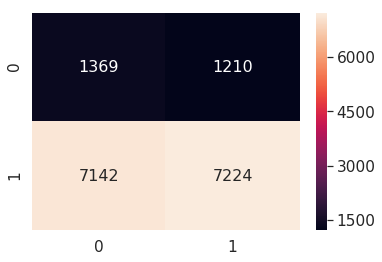

In [292]:
print("confusion matrix on test data")
a = confusion_matrix(Y_test, predict(y_test_pred_new, te_thresholds, test_fpr, test_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


confusion matrix on train data


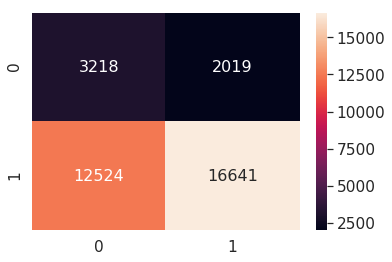

In [293]:
print("confusion matrix on train data")
a = confusion_matrix(Y_train, predict(y_train_pred_new, tr_thresholds, train_fpr, train_tpr))
b = pd.DataFrame(a, range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(b, annot=True,annot_kws={"size": 16}, fmt='g')


###pettytable

In [294]:
# compare all your models using Prettytable library
#ref : http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model" ,"max_depth","min_samples_split" ,"Train_Auc","Test_Auc"]

x.add_row(["BOW", "Decision trees",10,100,0.66,0.58])
x.add_row(["TF-IDf","Decision trees",10,100,0.662,0.58])
x.add_row(["AVGW2V", "Decision trees",10,1000,0.69,0.62])
x.add_row(["TFIDFW2V", "Decision trees",5,500,0.68,0.63])
x1 = PrettyTable()

x1.field_names = ["featurizer", "Model" ,"reguralizer","best hyperparametr" ,"Train_Auc","Test_Auc"]

x1.add_row(["top 5000 features", "svm","l2",0.001,0.63,0.55])
x1.add_row(["top 5000 features", "svm","l1",0.0001,0.63,0.57])


print(x)
print(x1)






+------------+----------------+-----------+-------------------+-----------+----------+
| Vectorizer |     Model      | max_depth | min_samples_split | Train_Auc | Test_Auc |
+------------+----------------+-----------+-------------------+-----------+----------+
|    BOW     | Decision trees |     10    |        100        |    0.66   |   0.58   |
|   TF-IDf   | Decision trees |     10    |        100        |   0.662   |   0.58   |
|   AVGW2V   | Decision trees |     10    |        1000       |    0.69   |   0.62   |
|  TFIDFW2V  | Decision trees |     5     |        500        |    0.68   |   0.63   |
+------------+----------------+-----------+-------------------+-----------+----------+
+-------------------+-------+-------------+--------------------+-----------+----------+
|     featurizer    | Model | reguralizer | best hyperparametr | Train_Auc | Test_Auc |
+-------------------+-------+-------------+--------------------+-----------+----------+
| top 5000 features |  svm  |      l2   

### <font color='blue'> Observations</font>

* 50k points were considered
* The data was splitted into train and test in the ratio of 3:1
* The traindata is again splitted into  train cross valiadted and test cross validated data in the ratio of 4:1

### <font color='violet'> Bag Of words</font>

* depth = 10
* no.of.samples = 100
  
* From the confusion matrix,
 
* For Train Data,

   * 13860+3932=17792 points are correctly classified 
   * 6125+1126= 7251 points are wrongly classified


* For Test Data,

   * 8152+1452 = 9604 poinst are correctly classified
   * 7793+2730 =10523 points are wrongly classified

### <font color='violet'> TFIDF</font>
 

* depth = 10
* no.of.samples = 100
* From the confusion matrix,


 
* For Train Data,

   * 12930+4024 = 16954 pouns are correctly classified**
   * 16238+1210 = 17448 points are wrongly classified**
* For Test Data,

   * 1757+6437 =8194 pouns are correctly classified**
   * 7930+821 = 8751 points are wrongly classified**


### <font color='violet'> Weighted W2V</font>
* depth = 10
no.of.samples = 1000
* From the confusion matrix,
 
* For Train Data,

   * 17987+3419 = 21406   pouns are correctly classified**
   * 11181+1815 = 12996  points are wrongly classified**

* For Test Data,

   * 1284+9897 = 11181  pouns are correctly classified**
   * 4470+1294 = 5764   points are wrongly classified**


### <font color='violet'> TFIDF Weighted W2V</font>
 

* depth = 5
* no.of.samples = 500
* From the confusion matrix,
 
* For Train Data,

   * 3695+16234 = 19929 pouns are correctly classified**
   * 12934+1539 = 15473 points are wrongly classified**

* For Test Data,

  * 1465+8874 = 10339  pouns are  correctly  classified**
  *  5493+1113 = 6606 points are  wrongly classified**


  ### <font color='violet'> Top 5000 features</font>
  
  ### <font color='blue'> sgd classifier with hinge loss(svm)-l2 penalty </font>
  
 

* Tha optimal alpha value is 0.001
* From the confusion matrix,
 
* For Train Data,

   * 3058+17855 = 20913 pouns are correctly classified**
   * 11313+2176 = 13489  points are wrongly classified**


* For Test Data,

   * 7916+1419 = 9335   pouns are correctly classified**
   * 6451+1159 = 7610 points are wrongly classified**
   
   
  ### <font color='blue'> sgd classifier with hinge loss(svm)-l1 penalty </font>
  
 

* Tha optimal alpha value is 0.0001
* From the confusion matrix,
 
* For Train Data,

   * 2964+17917 = 20881  pouns are correctly classified**
   * 11251 +2270 = 13521  points are wrongly classified**


* For Test Data,

   * 1336+7905 = 9241   pouns are correctly classified**
   *  6462+1242 = 7704 points are wrongly classified**
   
####From the pretty table,we can say that Tfidf-W2v model got higher auc than the other type of featurisations with 0.69 auc for train and 0.62 auc for test.
























My GitHub Link:
https://github.com/bharathpreetham